In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

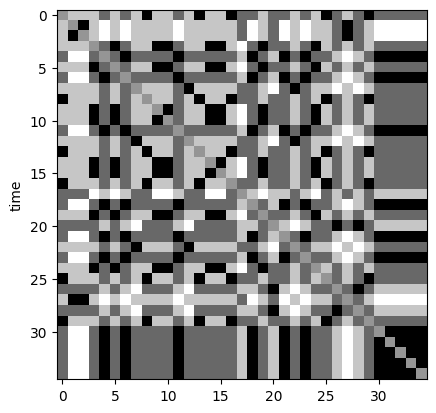

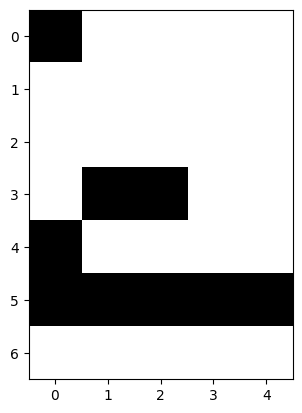

In [2]:
import numpy as np

import cellpylib as cpl

"""
Based on: http://neupy.com/2015/09/20/discrete_hopfield_network.html
"""
# patterns for training
zero = [
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 1, 1, 1, 0,
    0, 0, 0, 0, 0] # we add this last row so that we get an odd number of
                   #  total cells, so that we can specify a radius that includes exactly all the cells
one = [
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 0, 0, 0]

two = [
    1, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 0]
# replace the zeroes with -1 to make these vectors bipolar instead of binary
one = [-1 if x == 0 else x for x in one]
two = [-1 if x == 0 else x for x in two]
zero = [-1 if x == 0 else x for x in zero]

P = [zero, one, two]

# patterns to evaluate
half_zero = [
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0]

half_one = [
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0]

half_two = [
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 0]
half_zero = [-1 if x == 0 else x for x in half_zero]
half_one = [-1 if x == 0 else x for x in half_one]
half_two = [-1 if x == 0 else x for x in half_two]

cellular_automaton = np.array([half_two])

hopfield_net = cpl.HopfieldNet(num_cells=35)

hopfield_net.train(P)

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=155,
                                apply_rule=hopfield_net.apply_rule, r=hopfield_net.r)

cpl.plot(hopfield_net.W)
cpl.plot2d_animate(np.reshape(cellular_automaton, (155, 7, 5)))
